<a href="https://colab.research.google.com/github/Saad-7275/Saad-7275/blob/main/Statistics_%26_Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importing a CSV file into collab**

In [ ]:
df = pd.read_csv("train (1).csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.shape

(1460, 81)

In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
print(df['SalePrice'].describe())
print(df['SalePrice'].median())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
163000.0


In [ ]:
IQR = df['SalePrice'].quantile(0.75) - df['SalePrice'].quantile(0.25)
print(IQR)

# This shows that there are outliers present in the Dataset because of the value of INterquartile , and also the mean > median


84025.0


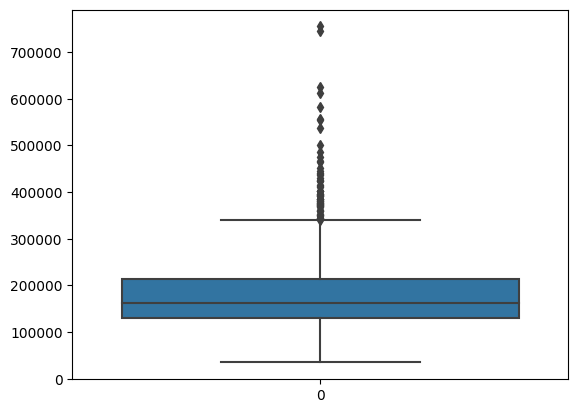

In [ ]:
sns.boxplot(df['SalePrice'])
plt.show()

**Now to find How many houses are in the Outliers Range**

In [ ]:
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
print(Q1)
print(Q3)

129975.0
214000.0


In [ ]:
LB = Q1 -1.5*IQR
UB = Q3 + 1.5*IQR
print(LB)
print(UB)

3937.5
340037.5


In [ ]:
outliers_range_houses_number = df[df['SalePrice']>UB].count()
outliers_range_houses_number

Id               61
MSSubClass       61
MSZoning         61
LotFrontage      58
LotArea          61
                 ..
MoSold           61
YrSold           61
SaleType         61
SaleCondition    61
SalePrice        61
Length: 81, dtype: int64

<ipython-input-11-a37eb32f89cb>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_sale_price)


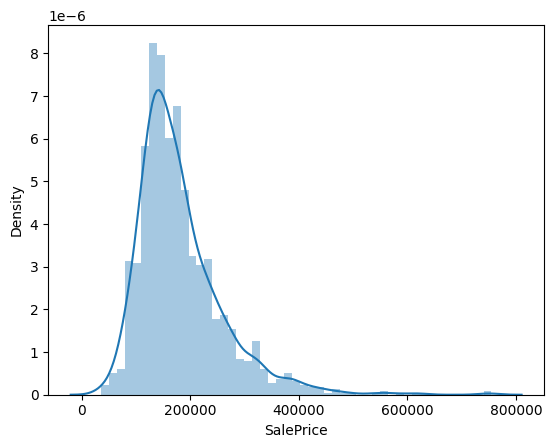

In [ ]:
# Skewness
# three types :-
# positive skewness , Negative skewness, Zero skewness

data_sale_price = df['SalePrice']
sns.distplot(data_sale_price)
plt.show()

**To Find the Redundancy or Mode or How many times the data is repeated for any particular value**

In [ ]:
df['SalePrice'].value_counts()

140000    20
135000    17
155000    14
145000    14
190000    13
          ..
202665     1
164900     1
208300     1
181500     1
147500     1
Name: SalePrice, Length: 663, dtype: int64

**Calculating the Range, Standard Deviation and the Variance**

In [ ]:
Range_of_Data = np.max(df['SalePrice']) - np.min([df['SalePrice']])
print(Range_of_Data)

Standard_deviation = df['SalePrice'].std()
print(Standard_deviation)

Variance = df['SalePrice'].var()
print(Variance)

720100
79442.50288288662
6311111264.297448


## **Finding the Correlation between the Columns and making an inference out of it by Ploting it on HeatMap**

           GrLivArea  SalePrice
GrLivArea   1.000000   0.708624
SalePrice   0.708624   1.000000


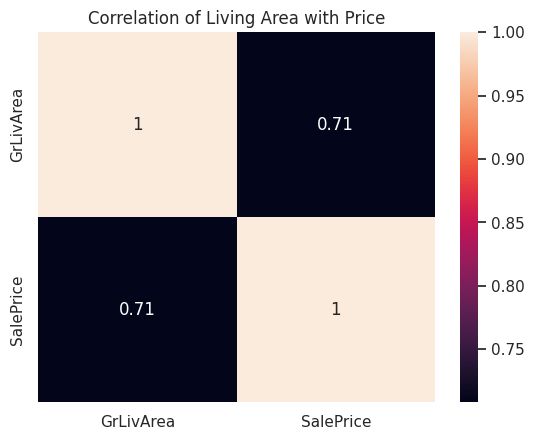

In [ ]:
x = df[['GrLivArea','SalePrice']]
result = x.corr()
print(result)


sns.set()

sns.heatmap(result,annot = True)
plt.title("Correlation of Living Area with Price")
plt.show()

In [ ]:
temp_1 = df[['GarageArea','SalePrice','LotArea','PoolArea','GrLivArea']]
result_1 = temp_1.corr()
print(result_1)

            GarageArea  SalePrice   LotArea  PoolArea  GrLivArea
GarageArea    1.000000   0.623431  0.180403  0.061047   0.468997
SalePrice     0.623431   1.000000  0.263843  0.092404   0.708624
LotArea       0.180403   0.263843  1.000000  0.077672   0.263116
PoolArea      0.061047   0.092404  0.077672  1.000000   0.170205
GrLivArea     0.468997   0.708624  0.263116  0.170205   1.000000


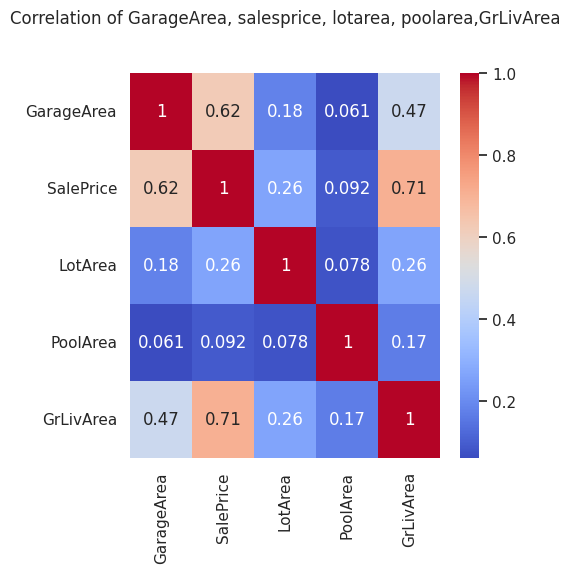

In [ ]:
plt.figure(figsize = (5,5))
sns.set()
sns.heatmap(result_1, annot = True, cmap = 'coolwarm', xticklabels=True)
plt.title("Correlation of GarageArea, salesprice, lotarea, poolarea,GrLivArea""\n""\n")
plt.show()

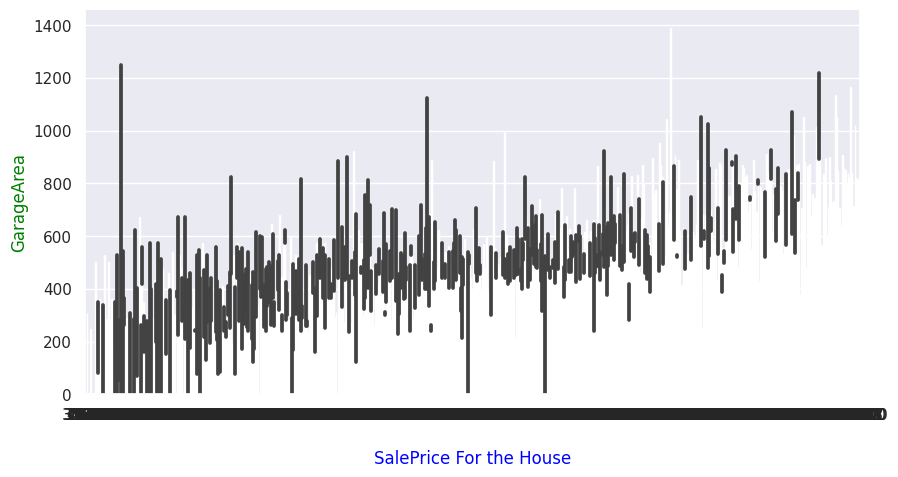

In [ ]:
plt.figure(figsize=(10,5))
sns.set()
color_palette = ['red', 'blue', 'green', 'orange']
sns.barplot(x = df['SalePrice'], y = df['GarageArea'], palette = color_palette)
plt.xlabel("\n""SalePrice For the House", color = 'Blue')
plt.ylabel("GarageArea", color = 'Green')
plt.show()